Tarea 5

Arbóles de decisión

Paola Vidal Ramírez


In [3]:
# Importamos las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
#Cargamos el dataset

data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

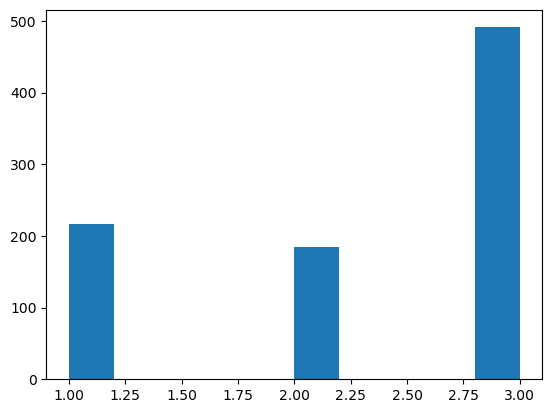

In [17]:
plt.hist(data.Pclass)

<Axes: xlabel='Embarked', ylabel='Survived'>

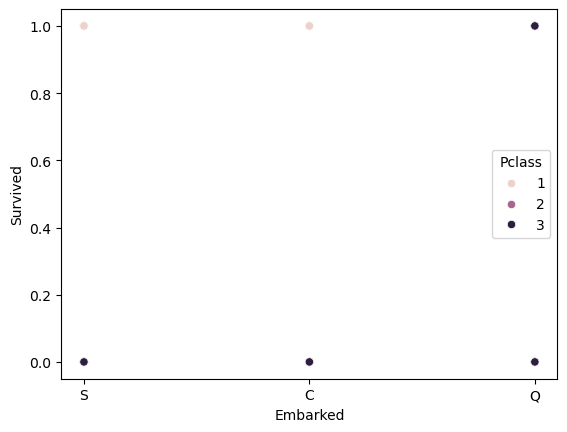

In [23]:
sns.scatterplot(x = "Embarked", y = "Survived", hue = "Pclass", data = data)

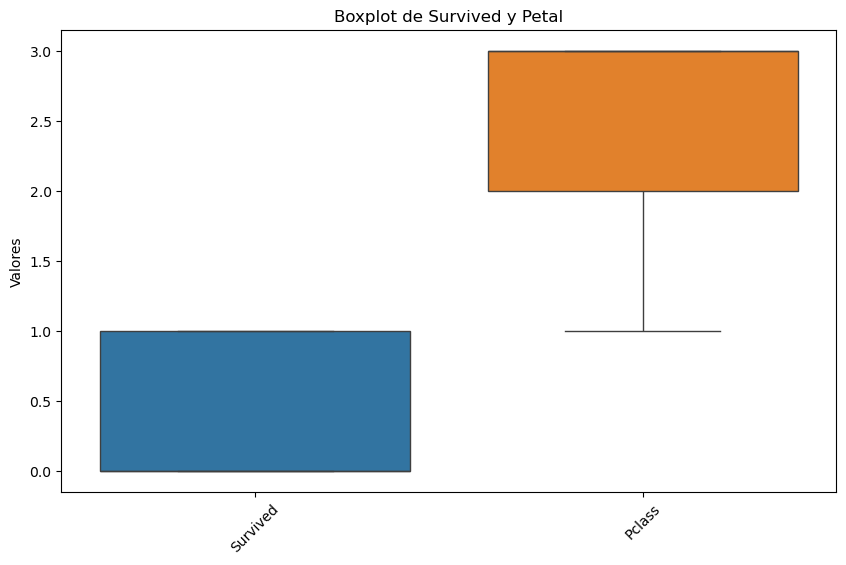

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Survived', 'Pclass', 'Survived', 'Pclass']])
plt.xticks(rotation=45)
plt.title('Boxplot de Survived y Pclass')
plt.ylabel('Valores')
plt.show()

In [27]:
predictors_col = ['Survived', 'Pclass', 'Survived', 'Pclass']
target_col = ['Pclass']

predictors = data[predictors_col]
target = data[target_col]

predictors

,Survived,Pclass,Survived,Pclass
0,0,3,0,3
1,1,1,1,1
2,1,3,1,3
3,1,1,1,1
4,0,3,0,3
...,...,...,...,...
886,0,2,0,2
887,1,1,1,1
888,0,3,0,3
889,1,1,1,1


In [29]:
target

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [31]:
corr = predictors.corr()
corr

,Survived,Pclass,Survived,Pclass
Survived,1.000000,-0.338481,1.000000,-0.338481
Pclass,-0.338481,1.000000,-0.338481,1.000000
Survived,1.000000,-0.338481,1.000000,-0.338481
Pclass,-0.338481,1.000000,-0.338481,1.000000


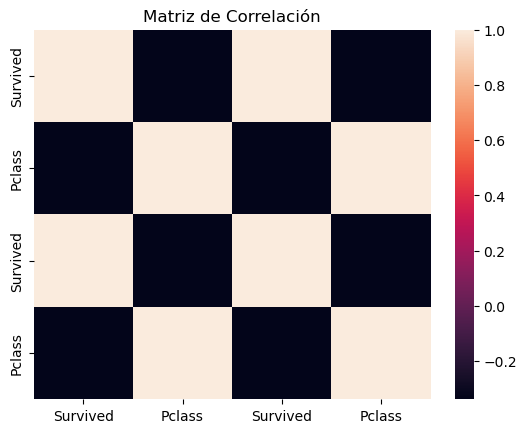

In [33]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

[Text(0.6, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.601\nsamples = 712\nvalue = [179.0, 148.0, 385.0]'),
 Text(0.4, 0.5, 'x[3] <= 1.5\ngini = 0.496\nsamples = 327\nvalue = [179, 148, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 179\nvalue = [179, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 148\nvalue = [0, 148, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 385\nvalue = [0, 0, 385]')]

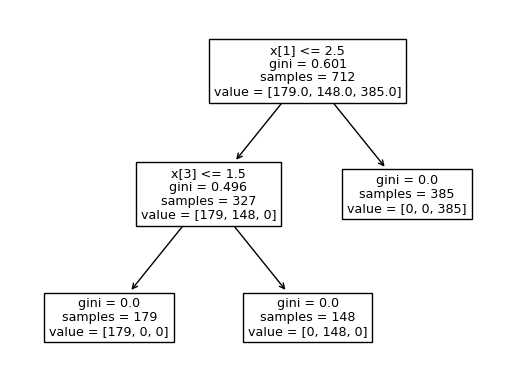

In [35]:
# Se dividen los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

# Se configura el clasificador base
tree = DecisionTreeClassifier()

arbol = tree.fit(X_train, y_train)

plot_tree(arbol)

In [37]:
predicciones = arbol.predict(X_test)

predicciones

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 3, 1,
       3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 1, 3, 2,
       1, 3, 1], dtype=int64)

In [39]:
# Examinamos la matriz de confusión

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,37,0,0
2,0,36,0
3,0,0,106


In [41]:
accuracy = accuracy_score(y_test,predicciones)
accuracy



1.0

In [43]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [45]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [47]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0

# Interpretación de resultados

En el análisis del conjunto de datos del Titanic, se utilizó un árbol de decisión para predecir la supervivencia de los pasajeros. La matriz de correlación mostró que la clase del pasajero (Pclass) tiene una correlación negativa moderada con la supervivencia (Survived), lo que indica que los pasajeros de clases más bajas tenían menos probabilidades de sobrevivir.

El árbol de decisión generado indica que las decisiones se basan en características como el sexo y la clase del pasajero, lo que refuerza la idea de que estos factores fueron determinantes en la supervivenciaa.